In [62]:
import pandas as pd

import seaborn as sns 

import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("/Users/sa17/Desktop/nba-stats/data/player_stats/merge2000-2024.csv")

df = df.drop_duplicates()

df

,Year,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
0,2011-2012,Kevin Durant,23.0,OKC,SF,66.0,66.0,2546.0,643.0,1297.0,...,527.0,231.0,88.0,77.0,248.0,133.0,1850.0,0.0,MVP-2ASNBA1,duranke01
1,2011-2012,LeBron James,27.0,MIA,SF,62.0,62.0,2326.0,621.0,1169.0,...,492.0,387.0,115.0,50.0,213.0,96.0,1683.0,0.0,MVP-1DPOY-4ASNBA1,jamesle01
2,2011-2012,Kobe Bryant,33.0,LAL,SG,58.0,58.0,2232.0,574.0,1336.0,...,313.0,264.0,69.0,18.0,204.0,105.0,1616.0,0.0,MVP-4ASNBA1,bryanko01
3,2011-2012,Russell Westbrook,23.0,OKC,PG,66.0,66.0,2331.0,578.0,1266.0,...,301.0,362.0,112.0,21.0,239.0,147.0,1558.0,0.0,MVP-12DPOY-18ASNBA2,westbru01
4,2011-2012,Kevin Love,23.0,MIN,PF,55.0,55.0,2145.0,474.0,1059.0,...,734.0,111.0,47.0,28.0,128.0,152.0,1432.0,0.0,MVP-6ASNBA2,loveke01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23579,2009-2010,Jason Hart,31.0,MIN,PG,1.0,0.0,5.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,hartja01
23580,2009-2010,Jason Hart,31.0,NOH,PG,4.0,0.0,17.0,1.0,1.0,...,2.0,5.0,1.0,1.0,3.0,4.0,2.0,0.0,NaN,hartja01
23581,2009-2010,JamesOn Curry,24.0,LAC,PG,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,curryja01
23582,2009-2010,Dwayne Jones,26.0,PHO,PF,2.0,0.0,7.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,jonesdw02


MVP is the dependent variable 

Find out which player and team has had the most and least mvp's. Why is that?

Why does this person made mvp compared to the other players?

Does they have a better or worst team?

How has nba awards changed compared the last 10 years and the the 20th?

Before 2022 did not need to play 65 games 

Everyone who won an MVP has won an All-star so I condensed the list to show everyone who got an all star award.

In [132]:
player_df = pd.DataFrame(df)[["Year", "Player", "Team", "Pos", "G", "MP", "PTS", "TRB","AST", "STL", "BLK", "FG%", "3P%", "FT%", "Awards"]]

# player_df = player_df.rename(columns={"Pos":"Position", "G":"Games Played", "MP":"Minutes Played",  "PTS":"Points", "TRB":"Rebounds", "AST":"Assists", "STL":"Steals", "BLK":"Blocks", "FG%":"Field Goal%", "3P%":"3 Point%", "FT%":"Free Throws%"})

# player_df.set_index("Year", inplace=True)

player_df.sort_values(by="Year", inplace=True)

player_df = player_df[player_df["Awards"] == "AS"]

# player_df = player_df[player_df["Year"] >= "2014"]

player_df = player_df.dropna()

player_df

,Year,Player,Team,Pos,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,Awards
14004,2000-2001,Antonio Davis,TOR,C,78.0,2729.0,1069.0,787.0,106.0,22.0,151.0,0.433,0.000,0.754,AS
14016,2000-2001,Vlade Divac,SAC,C,81.0,2420.0,974.0,673.0,231.0,87.0,93.0,0.482,0.286,0.691,AS
13960,2000-2001,Glenn Robinson,MIL,SF,76.0,2813.0,1674.0,526.0,252.0,86.0,62.0,0.468,0.299,0.820,AS
13963,2000-2001,Stephon Marbury,NJN,PG,67.0,2557.0,1598.0,205.0,506.0,79.0,5.0,0.441,0.328,0.790,AS
13971,2000-2001,Rasheed Wallace,POR,PF,77.0,2940.0,1477.0,602.0,212.0,90.0,135.0,0.501,0.321,0.766,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18148,2023-2024,Paolo Banchero,ORL,PF,80.0,2799.0,1804.0,554.0,431.0,71.0,47.0,0.455,0.339,0.725,AS
18154,2023-2024,Paul George,LAC,PF,74.0,2502.0,1671.0,388.0,262.0,113.0,37.0,0.471,0.413,0.907,AS
18173,2023-2024,Trae Young,ATL,PG,54.0,1942.0,1389.0,149.0,583.0,72.0,11.0,0.430,0.373,0.855,AS
18167,2023-2024,Donovan Mitchell,CLE,SG,55.0,1942.0,1463.0,280.0,333.0,101.0,30.0,0.462,0.368,0.865,AS


Everyone who won an MVP was an All-star so I condensed the list to show everyone who got an all star award.

How many time has a player been an all-star?

In [133]:
allstar = player_df.groupby("Player")["Awards"].count()

allstar = allstar.reset_index()

allstar = allstar.sort_values(by='Awards', ascending=False)

allstar

,Player,Awards
19,Chris Bosh,9
90,Ray Allen,7
85,Paul Pierce,6
2,Allen Iverson,5
53,Joe Johnson,5
...,...,...
20,Chris Kaman,1
18,Caron Butler,1
38,Glenn Robinson,1
73,Latrell Sprewell,1


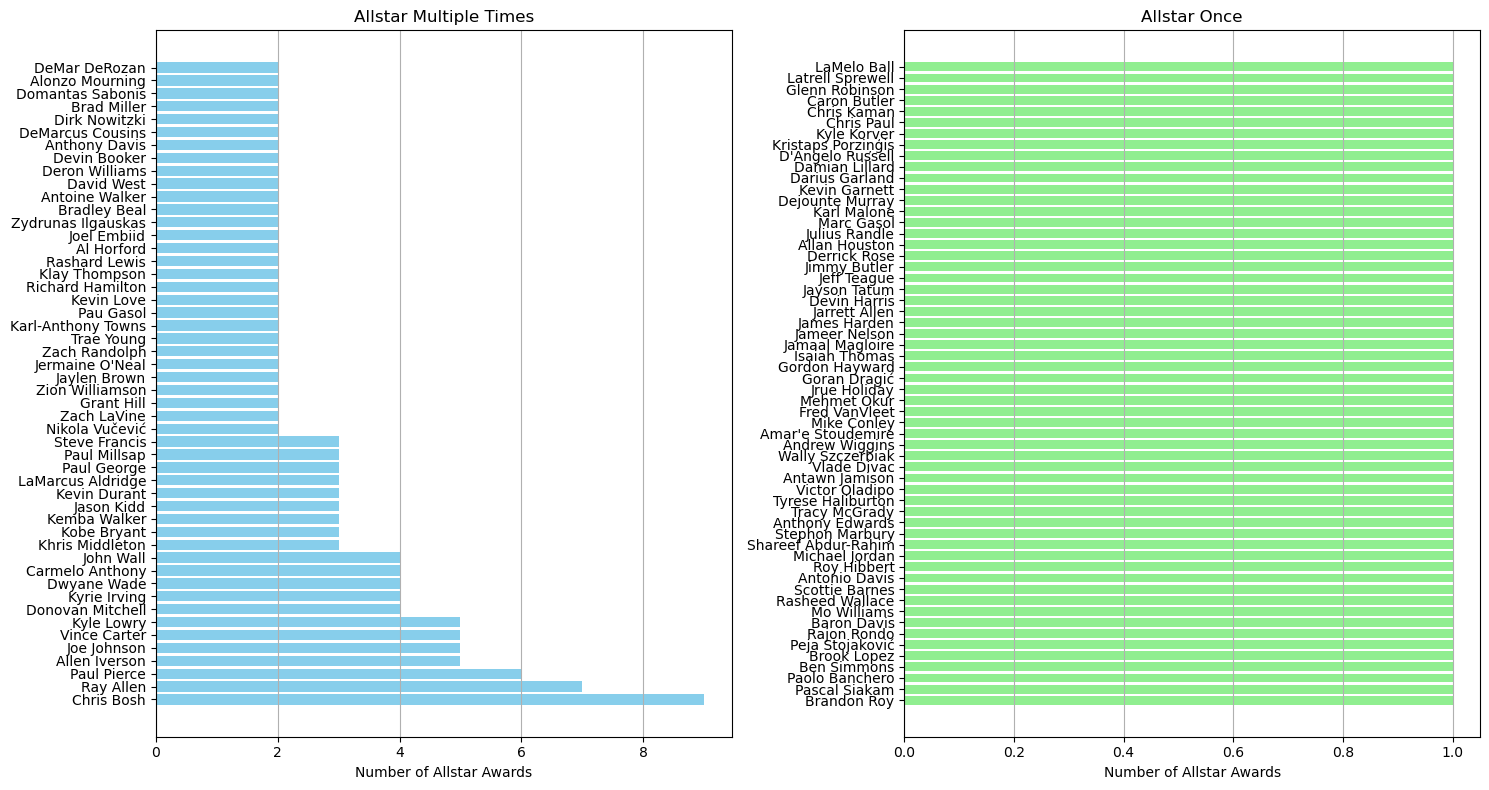

In [140]:
top_players = allstar[allstar["Awards"] >= 2]
other_players = allstar[allstar["Awards"] == 1]

# Create subplots to display two graphs
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Plot the top performers on the first subplot
ax[0].barh(top_players['Player'], top_players['Awards'], color='skyblue')
ax[0].set_title(f'Allstar Multiple Times')
ax[0].set_xlabel('Number of Allstar Awards')
ax[0].grid(True, axis='x')

# Plot the other players on the second subplot
ax[1].barh(other_players['Player'], other_players['Awards'], color='lightgreen')
ax[1].set_title(f'Allstar Once')
ax[1].set_xlabel('Number of Allstar Awards')
ax[1].grid(True, axis='x')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Chris Bosh, Ray Allen, Paul Pierce has been the allstar multiple times. Does being an allstar mutliple times correlate to becoming MVP?

In [145]:
mvp_df = pd.read_csv("/Users/sa17/Desktop/nba-stats/data/MVPs.csv")

mvp_df.sort_values(by="Year", inplace=True)

mvp_df

,Year,Player,Voting,Age,Tm,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Player-additional
23,2000-01,Allen Iverson,(V),25,PHI,71,42.0,31.1,3.8,4.6,2.5,0.3,0.420,0.320,0.814,11.8,0.190,iversal01
22,2001-02,Tim Duncan,(V),25,SAS,82,40.6,25.5,12.7,3.7,0.7,2.5,0.508,0.100,0.799,17.8,0.257,duncati01
21,2002-03,Tim Duncan,(V),26,SAS,81,39.3,23.3,12.9,3.9,0.7,2.9,0.513,0.273,0.710,16.5,0.248,duncati01
20,2003-04,Kevin Garnett,(V),27,MIN,82,39.4,24.2,13.9,5.0,1.5,2.2,0.499,0.256,0.791,18.3,0.272,garneke01
19,2004-05,Steve Nash,(V),30,PHO,75,34.3,15.5,3.3,11.5,1.0,0.1,0.502,0.431,0.887,10.9,0.203,nashst01
18,2005-06,Steve Nash,(V),31,PHO,79,35.4,18.8,4.2,10.5,0.8,0.2,0.512,0.439,0.921,12.4,0.212,nashst01
17,2006-07,Dirk Nowitzki,(V),28,DAL,78,36.2,24.6,8.9,3.4,0.7,0.8,0.502,0.416,0.904,16.3,0.278,nowitdi01
16,2007-08,Kobe Bryant,(V),29,LAL,82,38.9,28.3,6.3,5.4,1.8,0.5,0.459,0.361,0.840,13.8,0.208,bryanko01
15,2008-09,LeBron James,(V),24,CLE,81,37.7,28.4,7.6,7.2,1.7,1.1,0.489,0.344,0.780,20.3,0.318,jamesle01
14,2009-10,LeBron James,(V),25,CLE,76,39.0,29.7,7.3,8.6,1.6,1.0,0.503,0.333,0.767,18.5,0.299,jamesle01


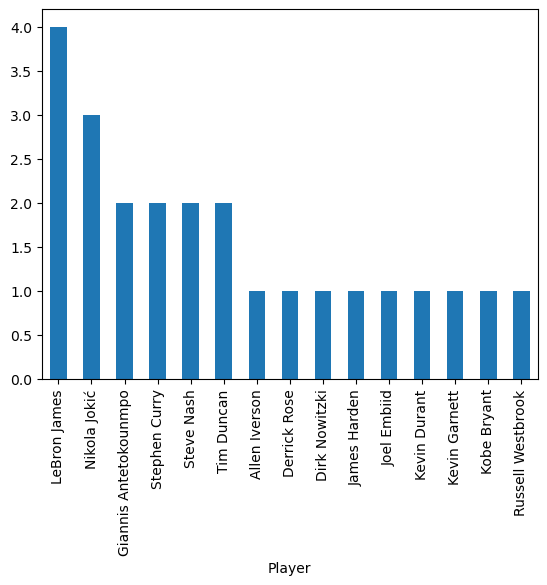

In [146]:
mvp_count = mvp_df.value_counts("Player").plot.bar()


The top 3 players with the most all stars award has never won a MVP

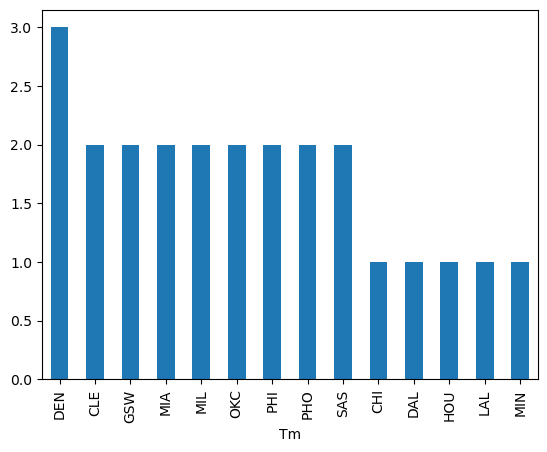

In [147]:
team_count = mvp_df.value_counts("Tm").plot.bar()